## Tarea 5 del curso CM-072

* Nombre y apellidos: Kevin Daniel Molina Bejar
* Fecha de presentación: 9 de octubre.

## Lista de preguntas:

1. Presentar un reporte del capítulo  Resampling Methods del libro [An Introduction to Statistical Learning](http://www-bcf.usc.edu/%7Egareth/ISL/index.html) de  Gareth James, Daniela Witten, Trevor Hastie y Robert Tibshirani. Páginas: 175-186. 

In [ ]:
# Tu respuesta

2. Sea el siguiente código acerca de validación cruzada y búsqueda grid. Usa GridSearchCV para ajustar n_neighbors of KNeighborsClassifier.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 200
import numpy as np

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digitos = load_digits()
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split( digitos.data, digitos.target)

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
cross_val_score(KNeighborsClassifier(), X_entrenamiento, y_entrenamiento, cv=5)

array([0.97794118, 0.98897059, 0.98148148, 0.98127341, 0.9962406 ])

In [5]:
from sklearn.model_selection import KFold, StratifiedKFold

In [6]:
cross_val_score(KNeighborsClassifier(),
                X_entrenamiento, y_entrenamiento, cv=KFold(n_splits=10, shuffle=True, random_state=42))

array([0.98518519, 0.97777778, 0.97777778, 0.97777778, 0.99259259,
       0.98518519, 0.98518519, 0.99253731, 0.99253731, 0.98507463])

Búsqueda grid con validación cruzada incorporada.

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Definimos los parametros grid:

In [8]:
parametros_grid = {'C': 10. ** np.arange(-3, 3),'gamma' : 10. ** np.arange(-5, 0)}
np.set_printoptions(suppress=True)
print(parametros_grid)

{'C': array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]), 'gamma': array([0.00001, 0.0001 , 0.001  , 0.01   , 0.1    ])}


In [9]:
busqueda_grid= GridSearchCV(SVC(), parametros_grid, verbose=3, cv=5)

Un objeto GridSearchCV se comporta como un clasificador normal.

In [10]:
busqueda_grid.fit(X_entrenamiento, y_entrenamiento)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.001, gamma=1e-05 ............................................
[CV] .. C=0.001, gamma=1e-05, score=0.10661764705882353, total=   0.4s
[CV] C=0.001, gamma=1e-05 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .. C=0.001, gamma=1e-05, score=0.10661764705882353, total=   0.3s
[CV] C=0.001, gamma=1e-05 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] .. C=0.001, gamma=1e-05, score=0.10740740740740741, total=   0.3s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] .. C=0.001, gamma=1e-05, score=0.10861423220973783, total=   0.3s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] .. C=0.001, gamma=1e-05, score=0.10902255639097744, total=   0.3s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] . C=0.001, gamma=0.0001, score=0.10661764705882353, total=   0.3s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] . C=0.001, gamma=0.0001, score=0.10661764705882353, total=   0.3s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] . C=0.001, gamma=0.0001, score=0.10740740740740741, total=   0.3s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] . C=0.001, gamma=0.0001, score=0.10861423220973783, total=   0.3s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] .

[CV] ..... C=0.1, gamma=0.001, score=0.9632352941176471, total=   0.2s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.9705882352941176, total=   0.2s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.9666666666666667, total=   0.2s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.9400749063670412, total=   0.2s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.9511278195488722, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ..... C=0.1, gamma=0.01, score=0.10661764705882353, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ..... C=0.1, gamma=0.01, score=0.10661764705882353, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] ..... C=10.0, gamma=0.01, score=0.7752808988764045, total=   0.3s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] ..... C=10.0, gamma=0.01, score=0.7706766917293233, total=   0.3s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ..... C=10.0, gamma=0.1, score=0.10661764705882353, total=   0.3s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ..... C=10.0, gamma=0.1, score=0.10661764705882353, total=   0.3s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ..... C=10.0, gamma=0.1, score=0.10740740740740741, total=   0.3s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ..... C=10.0, gamma=0.1, score=0.10861423220973783, total=   0.3s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ..... C=10.0, gamma=0.1, score=0.10902255639097744, total=   0.3s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   54.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]), 'gamma': array([0.00001, 0.0001 , 0.001  , 0.01   , 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [11]:
busqueda_grid.predict(X_prueba)

array([4, 5, 2, 8, 1, 3, 4, 9, 5, 9, 8, 2, 8, 5, 8, 5, 2, 2, 3, 0, 5, 8,
       5, 5, 4, 4, 1, 8, 3, 5, 6, 2, 8, 1, 2, 0, 4, 1, 4, 2, 1, 1, 7, 3,
       3, 6, 0, 2, 6, 0, 9, 3, 8, 6, 9, 3, 4, 8, 3, 1, 0, 3, 3, 7, 3, 8,
       5, 0, 4, 0, 4, 4, 3, 0, 6, 0, 1, 8, 3, 6, 9, 9, 4, 2, 2, 0, 0, 3,
       2, 4, 8, 1, 3, 6, 6, 8, 3, 5, 7, 6, 9, 8, 5, 7, 4, 2, 8, 3, 3, 4,
       2, 7, 5, 6, 3, 1, 1, 9, 5, 4, 0, 2, 7, 5, 0, 5, 4, 4, 3, 8, 5, 3,
       0, 3, 1, 0, 4, 6, 3, 4, 4, 7, 6, 8, 1, 1, 0, 8, 1, 7, 4, 3, 5, 1,
       8, 8, 8, 7, 9, 0, 9, 5, 8, 6, 2, 0, 6, 9, 1, 4, 3, 3, 3, 7, 7, 0,
       7, 4, 5, 1, 8, 5, 9, 8, 0, 0, 0, 4, 2, 5, 6, 8, 1, 1, 6, 5, 9, 1,
       5, 0, 4, 0, 1, 8, 3, 2, 5, 0, 2, 8, 5, 7, 4, 7, 4, 9, 6, 0, 1, 9,
       8, 6, 4, 6, 6, 3, 2, 1, 2, 4, 4, 9, 2, 7, 5, 1, 0, 5, 1, 8, 9, 0,
       5, 7, 7, 0, 7, 1, 0, 5, 6, 5, 6, 8, 3, 2, 9, 9, 2, 3, 8, 7, 9, 4,
       4, 7, 0, 0, 1, 2, 9, 6, 8, 7, 0, 3, 3, 5, 1, 0, 7, 2, 3, 3, 4, 4,
       6, 3, 6, 9, 1, 6, 9, 3, 6, 6, 4, 6, 8, 5, 1,

In [12]:
busqueda_grid.score(X_prueba, y_prueba)

0.9911111111111112

In [13]:
busqueda_grid.best_params_

{'C': 10.0, 'gamma': 0.001}

In [14]:
busqueda_grid.best_score_

0.9881217520415738

In [15]:
busqueda_grid.best_estimator_

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Extraemos los puntajes

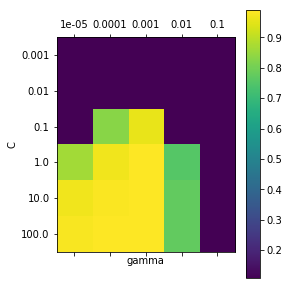

In [16]:
puntuaciones = busqueda_grid.cv_results_['mean_test_score']
puntuaciones = np.array(puntuaciones).reshape(6, 5)

plt.matshow(puntuaciones)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(5), parametros_grid['gamma'])
plt.yticks(np.arange(6), parametros_grid['C']);


In [ ]:
# Tu solucion

In [18]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(2,10)
weights = ['uniform','distance']
grid_knn = {'n_neighbors':neighbors, 'weights':weights}
gridsearch_kNN = GridSearchCV(KNeighborsClassifier(), grid_knn, scoring='accuracy', cv=5)
gridsearch_kNN.fit(X_entrenamiento,y_entrenamiento)


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [19]:
gridsearch_kNN.best_params_


{'n_neighbors': 3, 'weights': 'distance'}

In [21]:
gridsearch_kNN.best_score_

0.9881217520415738